# Quantum repetition code for phase-flips

<div style="width:100%;text-align:right;font-size:0.75em;opacity:0.2">Latex macros</div>
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\bra}[1]{\langle #1|} $
$\newcommand{\iu}{{i\mkern1mu}}$
$ \newcommand{\e}{\mathrm{e}}$
$\newcommand{\bigo}{\mathcal{O}}$
$\newcommand{\set}[1]{\{#1\}}$
$\newcommand{\oper}[1]{\mathcal{#1}}$
$\newcommand{\st}[1]{\mathcal{#1}}$
$\newcommand{\vecs}[1]{\mathcal{#1}}$
$\newcommand{\group}[1]{\mathcal{#1}}$
$\newcommand{\union}{\hspace{0.25em}\cup\hspace{0.25em}}$

The code presented in the previous notebook could only correct for $X$ errors. Now, we present a code that can only correct for $Z$ errors. In the next notebook, we will combine these codes together to correct for both $X$ and $Z$ errors and more.

Alice, again wants to send a one-qubit state $\ket{\psi}$ to Bob, but via a channel that applies the $Z$ operator to qubits with probability $p$. This results in the phase flip,
\begin{equation}
  \ket{\tilde\psi} = Z\ket{\psi} = Z(\alpha\ket{0} + \beta\ket{1}) = \alpha\ket{0} - \beta\ket{1}.
\end{equation}
As before, Bob has no way of knowing if any errors occured.

### Encoding
To protect against such type of errors, we will employ a repetition code, but with a different basis. Now,
\begin{align}
  \ket{0} \to \ket{\bar{0}} = \ket{+++}, \\
  \ket{1} \to \ket{\bar{1}} = \ket{---}.
\end{align}
For this code basis, a qubit in state $\ket{\psi}$ is encoded as
\begin{equation}
  \ket{\psi}\ket{00} = (\alpha\ket{0} + \beta\ket{1})\ket{00} \to \ket{\bar\psi} = \alpha\ket{+++} + \beta\ket{---}. 
\end{equation}
This is done via the following circuit.

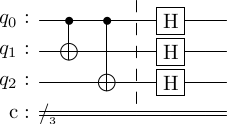

In [1]:
import stac
enc_circ = stac.Circuit()
enc_circ.append('CX', 0, 1)
enc_circ.append('CX', 0, 2)
enc_circ.append('TICK')
for i in range(3):
    enc_circ.append('H', i)
enc_circ.draw()

#### Task 1 (On paper)
Determine logical gate operations $\bar{X}$ and $\bar{Z}$ for the three-qubit repetition code for phase-flips. These are operations that act on the logical basis $\set{\ket{\bar{0}}, \ket{\bar{1}}}$, in the normal way, i.e.
  \begin{align}
    \bar{X}\ket{\bar{0}} &= \ket{\bar{1}}, \quad \bar{X}\ket{\bar{1}} = \ket{\bar{0}}, \\
    \bar{Z}\ket{\bar{0}} &= \ket{\bar{0}}, \quad \bar{Z}\ket{\bar{1}} = -\ket{\bar{1}}.
  \end{align}
  They can be constructed by some combination of operations on the three physical qubits. You will discover that there are possibly multiple ways of doing so.

### Errors
The possible errors on the encoded state are given as follows.

| Error       | Probability |
|:-----------:|:-----------:|
| $I$         | $(1-p)^3$   |
| $Z_1$       | $p(1-p)^2$  |
| $Z_2$       | $p(1-p)^2$  |
| $Z_3$       | $p(1-p)^2$  |
| $Z_1Z_2$    | $p^2(1-p)$  |
| $Z_1Z_3$    | $p^2(1-p)$  |
| $Z_2Z_3$    | $p^2(1-p)$  |
| $Z_1Z_2Z_3$ | $p^3$       |

#### Task 2 (On paper)
Determine the impact of each error on the input basis states.

Let input state be $\ket{000}$

|  Error       | Output state | 
|:------------:|:------------:|
|  $I$         | $\ket{+++}$  |
|  $Z_0$       | $\ket{+++}$  |
|  $Z_1$       | $?$          |
|  $Z_2$       | $?$          |
|  $Z_0Z_1$    | $?$          |
|  $Z_0Z_2$    | $?$          |
|  $Z_1Z_2$    | $?$          |
|  $Z_0Z_1Z_2$ | $?$          |

Let input state be $\ket{111}$

|  Error       | Output state | 
|:------------:|:------------:|
|  $I$         | $\ket{---}$  |
|  $Z_0$       | $\ket{+--}$  |
|  $Z_1$       | $?$          |
|  $Z_2$       | $?$          |
|  $Z_0Z_1$    | $?$          |
|  $Z_0Z_2$    | $?$          |
|  $Z_1Z_2$    | $?$          |
|  $Z_0Z_1Z_2$ | $?$          |

Do different errors result in the same output state?

As before, we will assume that $p$ is small, so we will only attempt to correct the errors $\set{I,Z_1,Z_2,Z_3}$. The effect of the $Z$ errors is to flip the state between plus and minus. So, for instance,
\begin{equation}
  Z_1\ket{\bar{\psi}} = \alpha Z_1\ket{+++} + \beta Z_1\ket{---} = \alpha\ket{-++} + \beta\ket{+--}.
\end{equation}

### Decoding
The error detection strategy is the same as before. Bob employs a circuit that compares the value of two pairs of qubits, but in the plus/minus basis. This is accomplished using the following circuit.

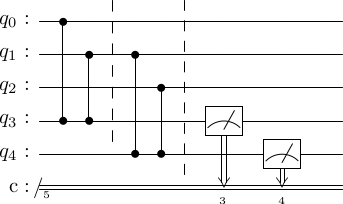

In [2]:
synd_circ = stac.Circuit()
synd_circ.append('CZ', 0, 3)
synd_circ.append('CZ', 1, 3)
synd_circ.append('TICK')
synd_circ.append('CZ', 1, 4)
synd_circ.append('CZ', 2, 4)
synd_circ.append('TICK')
synd_circ.append('M', 3)
synd_circ.append('M', 4)
synd_circ.draw()

To determine the syndromes, we can do the following

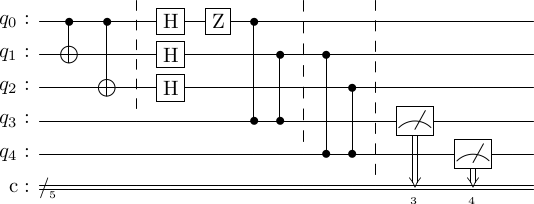

[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]


In [4]:
circ = stac.Circuit()
# encode the 0 state
circ += enc_circ

# add an error
circ.append('Z', 0)

# do a syndrome measurement
circ += synd_circ

# draw to make sure you we understand what is happending
circ.draw()

# sample the output 10 times
circ.sample(10)

#### Task 3
Fill the following table

| Syndrome | Inferred error |
|:--------:|:--------------:|
| $00$     | $I$            |
| $01$     |                |
| $10$     |                |
| $11$     |                |

In this code, if Bob infers that errors $Z_i$ occurs, than he applies $Z_i$ to the corrupted codeword to fix it.

### Bit-flip errors
We won't belabor the point that this code cannot fix bit-flip errors. 